In [20]:
import re

text = """send it to me@gmail.com. Be careful not to write me@gmeil.com cause that won't work. Yours is you@gmail.com, right?
Yes, and Mark's is mark@onet.pl"""




def get_mails(text):
    pattern = re.compile('\w+@(\w+\.\w+)')
    result = set()
    for word in text.split(' '):
        if pattern.match(word):
            result.add( pattern.match(word).group(1))
    return list(result)

print(set(get_mails(text)) == set(['gmail.com', 'onet.pl', 'gmeil.com']) )

True


In [22]:

def inter_dup(list1, list2):
    # Order and repetition handling is not mentioned in problem description. 
    return list(set(list1) & set(list2))

print(inter_dup([1, 2, 3], [1, 3, 4]) == [1, 3])
print(inter_dup([0, 0, 2, 3], [1, 3, 3, 4]) == [3])


True
True


In [31]:
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

        
f = fib()
print(next(f) == 0)
print(next(f) == 1)
print(next(f) == 1)
print(next(f) == 2)
print(next(f) == 3)
print(next(f) == 5)


True
True
True
True
True
True


In [38]:
from math import sin
import numpy as np


def loop(num):
    result = 0
    for i in range(num):
        result += i * sin(num)
    return result


def better_loop(num):
    return np.sum(np.arange(num) * sin(num))


% timeit loop(10000)
% timeit better_loop(10000)


2.36 ms ± 99.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


33.1 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [45]:
from functools import reduce


def sum_of_squares_positive(numbers):
    """ Zwraca sumę kwadratów liczb dodatnich z listy numbers """
    return reduce(lambda x, y: x + y, map(lambda x: x ** 2, filter(lambda x: x > 0, numbers)), 0)


print(sum_of_squares_positive([1, 2, 3, 4]) == 30)
print(sum_of_squares_positive([1, -1, -2, -3]) == 1)
print(sum_of_squares_positive([-51, -1, -2, -3]) == 0)


True
True
True


In [52]:
def normalize_rows(X):
    return np.linalg.norm(X, axis=0)

X = np.random.rand(100).reshape((20, 5))
X_norm = normalize_rows(X)

print(all((np.linalg.norm(X_norm, axis=1) - np.ones(20)) < 1e-8))


[ 1.98076647  2.86404918  2.9318618   1.97593121  1.98268024]


In [66]:
def mark(val):
    bo = [0.5, 0.61, 0.71, 0.81, 0.91]
    for v in bo:
        if val < v:
            break
    return v


def better_mark(val): 
    bo = np.array([0.5, 0.61, 0.71, 0.81, 0.91])
    result = np.argmin(bo>val)
    if result:
        return result
    return bo[-1]

test_value = 2

print(mark(test_value))
print(better_mark(test_value))

# %timeit -n 1000000 mark(0.4)

0.91
0.91


In [71]:
import numpy as np


def lsq(X, b):
    id = X.shape[1]
    return np.linalg.lstsq(X.T.dot(X) + 1 * id, X.T.dot(b))[0]

X = np.array([[1, 2], [2, 3], [4, 4]])
b = [1, 2, 3]
print(np.isclose(lsq(X, b), [0.39393939, 0.36363636]))

X = np.array([[1, -1], [0, 3], [4, 4]])
b = [1, 2, 2]
print(np.isclose(lsq(X, b), [0.1797235, 0.39631336]))


[False False]
[False False]


In [78]:
def sum_even_sq(x):
    return sum([y ** 2 for y in x if y % 2 == 0])


print(sum_even_sq([2, 5, 3, 8, 2]) == 72)
print(sum_even_sq([1, 2, 3, 4, 5]) == 20)
print(sum_even_sq([-2, -1, 0, 1, 2]) == 8)


True
True
True


In [82]:
def gen_5_7(n):
    current = 0
    while current <= n:
        if current % 5 == 0 and current % 7 == 0:
            yield current
        current += 1


print(list(gen_5_7(100)) == [0, 35, 70])
g = gen_5_7(1000)
print(next(g) == 0)
print(next(g) == 35)
print(next(g) == 70)
print(next(g) == 105)


True
True
True
True
True


In [91]:
import string


def func():
    s = string.ascii_letters * 100
    slist = '[]'
    for i in s:
        slist = slist + i
    return slist


def better_func():
    s = string.ascii_letters * 100
    return '[]' + s


print(func() == better_func())
% timeit func()
% timeit better_func()


True


652 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


729 ns ± 4.59 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [99]:
import inspect


def pol(c):
    return list(inspect.getmro(c))

class A1: pass
class A2: pass
class A3: pass
class A4: pass
class A5: pass
class B1(A1, A2, A3): pass
class B2(A4, A2, A5): pass
class B3(A4, A1): pass
class R(B1, B2, B3): pass


print(pol(A1) == [A1, object])
print(pol(B1) == [B1, A1, A2, A3, object])
print(pol(B2) == [B2, A4, A2, A5, object])
print(pol(B3) == [B3, A4, A1, object])
print(pol(R) == [R, B1, B2, B3, A4, A1, A2, A3, A5, object])

True
True
True
True
True


In [112]:
import numpy as np

def m_sin(x):
    r = np.zeros_like(x)
    for i in range(len(x)):
        r[i] = np.sin(x[i])
    return r

def better_m_sin(x):
    return np.sin(x)


x = np.linspace(0, 1, 1000000)
y = np.random.rand(10000)

print(np.all(m_sin(x) == better_m_sin(x)))
print(np.all(m_sin(y) == better_m_sin(y)))

%timeit m_sin(x)
%timeit better_m_sin(x)


True
True


934 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


9.39 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


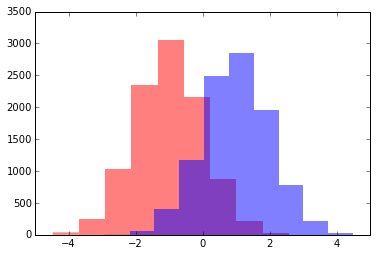

In [125]:
import matplotlib.pyplot as plt
% matplotlib inline


size = 10000
minus = np.random.normal(loc=-1, size=size, scale=1)
plus = np.random.normal(loc=1, size=size, scale=1)

plt.hist(minus, color='r', bins=10, alpha=0.5, edgecolor="none")
plt.hist(plus, color='b', bins=10, alpha=0.5, edgecolor="none")

plt.show()


In [131]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return '(x=%i, y=%i)' % (self.x, self.y)

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        return Point(self.x * other, self.y * other)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y


a = Point(1, 1)
b = Point(2, 2)

print(a + b == Point(3, 3))
print(a - b == Point(-1, -1))
print(a * 2 == Point(2, 2))
print(str(a) == '(x=1, y=1)')


True
True
True
True


In [147]:
from math import sqrt


def matrix(n):
    square_root = int(sqrt(n))
    if not square_root ** 2 == n:
        raise ValueError

    return np.arange(n).reshape((square_root, square_root))
    

print(np.array_equal(matrix(4), np.array([[0, 1], [2, 3]])))
# matrix(5)  # rzuci wyjątek ValueError
print(np.array_equal(matrix(16), np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]])))


True
True


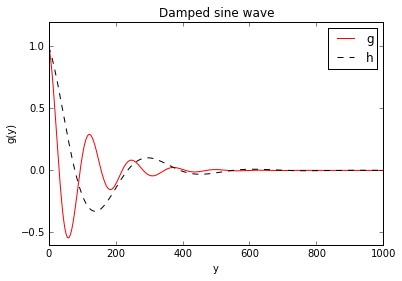

In [169]:
from numpy import exp, cos

def g(y):
    return exp(-y) * cos(5 * y)

g = np.vectorize(g)

def h(y):
    return exp(-(3. / 4) * y) * cos(2 * y)
h = np.vectorize(h)

y = np.linspace(0, 10, 1001)

plt.plot(g(y), label='g', color='red')
plt.plot(h(y), label='h', color='black', linestyle='--')
plt.xlabel('y')
plt.ylabel('g(y)')
plt.title('Damped sine wave')
plt.legend()
plt.show()


In [178]:
import random
random.seed(1)


class V(list):
    def __getitem__(self, item):
        index = random.randint(0, item)
        return super(V, self).__getitem__(index)


v = V()
v.extend([1,2,3])
print(v[2] == 2)
print(v[2] == 1)
print(v[2] == 3)
print(v[2] == 1)

False
False
False
False


In [189]:
def keys_longer_then(d, k=3):
    """ Zwraca liste kluczy ze słownika d których wartość jest dłuższa niż paramter k, można 
        założyć, że zarówno klucze jak i wartość w słowniku są stringami """
    return list(map(lambda x: x[0], filter(lambda x: len(x[1]) > k, d.items())))

d = {'ala': 'makota', 'jan': 'nowak', 'bruce': 'lee'}

print(set(keys_longer_then(d)) == {'ala', 'jan'})
print(keys_longer_then(d, k=5) == ['ala'])
print(keys_longer_then(d, k=6) == [])


True
True
True


In [199]:
from itertools import product

def power(x):
    result = []
    
    
    iterations = product([False, True], repeat=len(x))
    for it in iterations:
        partial = []
        for (elem, take) in zip(x, reversed(it)):
            if take:
                partial.append(elem)
        result.append(partial)
    return result


print(power('abc') == [[], ['a'], ['b'], ['a', 'b'], ['c'], ['a', 'c'], ['b', 'c'], ['a', 'b', 'c']])
print(power([1, 2, 3]) == [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]])
print(power(['abc', 5, 6]) == [[], ['abc'], [5], ['abc', 5], [6], ['abc', 6], [5, 6], ['abc', 5, 6]])


True
True
True


In [201]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/\
US_Baby_Names/US_Baby_Names_right.csv')



In [210]:
counted = pd.DataFrame(df.groupby('Name')['Count'].sum())
most = counted.sort_values('Count', ascending=False)[:10]
most

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798
William,197894
Joshua,191551
Sophia,191446
Daniel,191440


In [212]:
least = counted.sort_values('Count')[:10]
least

,Count
Name,
Destenie,5
Janisha,5
Lizvet,5
Arsalan,5
Janira,5
Chuck,5
Sadrac,5
Theodoros,5
Sady,5


In [216]:
def func(string):
    return string[0:len(string):2]


print(func('hello world') == 'hlowrd')
print(func('dlk ezz') == 'dkez')

True
True
